## Import Packages

In [212]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import scipy
import numpy
import matplotlib
import pandas
import sklearn
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


## Reduce memory usage

In [213]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        col_type2 = df[col].dtype.name
        
        if ((col_type != object) and (col_type2 != 'category')):
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [214]:
#Load dataset
dataset = reduce_mem_usage(pd.read_csv('/Users/jass/Documents/masterhsmainz/4th semester summer 2022/Bus Ana/final project/preprocessed dataset/no one hot/instacart_100k_noh_aisleid.csv'))

Memory usage of dataframe is 5.34 MB
Memory usage after optimization is: 0.95 MB
Decreased by 82.1%


In [215]:
print(dataset.shape)

(100000, 7)


In [216]:
dataset.head()

,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,aisle_id,department
0,5,18,NaN,9,0,83,produce
1,0,12,21.0,6,0,83,produce
2,3,22,9.0,5,1,24,produce
3,0,9,12.0,4,1,83,produce
4,6,19,20.0,10,1,16,produce


### Number of Categories (5 categories)

In [217]:
dataset['department'].unique()

['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen']
Categories (5, object): ['beverages', 'dairy eggs', 'frozen', 'produce', 'snacks']

In [218]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))

dataset['department'].value_counts().sort_values(ascending=True)

beverages     20000
dairy eggs    20000
frozen        20000
produce       20000
snacks        20000
Name: department, dtype: int64

<Figure size 1080x432 with 0 Axes>

In [219]:
#dataset['department'] = dataset['department'].map({'beverages' :0, 'produce' :1, 'snacks' :2, 'dairy eggs' :3, 'frozen' :4}).astype(int)


In [220]:
dataset.head()

,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,aisle_id,department
0,5,18,NaN,9,0,83,produce
1,0,12,21.0,6,0,83,produce
2,3,22,9.0,5,1,24,produce
3,0,9,12.0,4,1,83,produce
4,6,19,20.0,10,1,16,produce


In [221]:
dataset.dtypes

order_dow                     int8
order_hour_of_day             int8
days_since_prior_order     float16
add_to_cart_order            int16
reordered                     int8
aisle_id                     int16
department                category
dtype: object

### minmaxscaler

In [222]:
#minmaxscaler
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(dataset.select_dtypes(np.number))

In [223]:
d.shape

(100000, 6)

In [224]:
d

array([[0.8333334 , 0.7826087 ,        nan, 0.05594406, 0.        ,
        0.63779527],
       [0.        , 0.5217391 , 0.70000005, 0.03496503, 0.        ,
        0.63779527],
       [0.5       , 0.95652175, 0.3       , 0.02797203, 1.        ,
        0.17322835],
       ...,
       [1.        , 0.5652174 , 0.16666667, 0.09090909, 1.        ,
        0.8976378 ],
       [1.        , 0.6086957 , 0.33333334, 0.01398601, 1.        ,
        0.31496063],
       [0.8333334 , 0.6956522 , 0.43333337, 0.05594406, 1.        ,
        0.6062992 ]], dtype=float32)

In [225]:
dataset['department']

0        produce
1        produce
2        produce
3        produce
4        produce
          ...   
99995     frozen
99996     frozen
99997     frozen
99998     frozen
99999     frozen
Name: department, Length: 100000, dtype: category
Categories (5, object): ['beverages', 'dairy eggs', 'frozen', 'produce', 'snacks']

In [226]:
# to get only department
dep = dataset['department'].to_numpy()

In [227]:
dep

array(['produce', 'produce', 'produce', ..., 'frozen', 'frozen', 'frozen'],
      dtype=object)

In [228]:
dep = pd.DataFrame(dep, columns=['department']) 

### Transform department names to numeric

In [229]:
dep['department'] = dep['department'].map({'beverages' :0, 'produce' :1, 'snacks' :2, 'dairy eggs' :3, 'frozen' :4}).astype(int)


In [230]:
dep.shape

(100000, 1)

### To put target variables (departments) next to normalized data 

In [231]:
dataset2 = numpy.column_stack((d, dep))

In [232]:
dataset2.shape

(100000, 7)

In [233]:
dataset2

array([[0.83333337, 0.78260869,        nan, ..., 0.        , 0.63779527,
        1.        ],
       [0.        , 0.52173913, 0.70000005, ..., 0.        , 0.63779527,
        1.        ],
       [0.5       , 0.95652175, 0.30000001, ..., 1.        , 0.17322835,
        1.        ],
       ...,
       [1.        , 0.56521738, 0.16666667, ..., 1.        , 0.89763778,
        4.        ],
       [1.        , 0.60869569, 0.33333334, ..., 1.        , 0.31496063,
        4.        ],
       [0.83333337, 0.69565219, 0.43333337, ..., 1.        , 0.60629922,
        4.        ]])

In [234]:
dataset = pd.DataFrame(dataset2, columns=['order_dow', 'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order', 'reordered', 'aisle_id', 'department'])






In [235]:
dataset

,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,aisle_id,department
0,0.833333,0.782609,NaN,0.055944,0.0,0.637795,1.0
1,0.000000,0.521739,0.700000,0.034965,0.0,0.637795,1.0
2,0.500000,0.956522,0.300000,0.027972,1.0,0.173228,1.0
3,0.000000,0.391304,0.400000,0.020979,1.0,0.637795,1.0
4,1.000000,0.826087,0.666667,0.062937,1.0,0.110236,1.0
...,...,...,...,...,...,...,...
99995,0.166667,0.565217,0.166667,0.013986,1.0,0.606299,4.0
99996,1.000000,0.956522,0.200000,0.146853,0.0,0.897638,4.0
99997,1.000000,0.565217,0.166667,0.090909,1.0,0.897638,4.0
99998,1.000000,0.608696,0.333333,0.013986,1.0,0.314961,4.0


In [236]:
dataset.head(20)

,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,aisle_id,department
0,0.833333,0.782609,NaN,0.055944,0.0,0.637795,1.0
1,0.000000,0.521739,0.700000,0.034965,0.0,0.637795,1.0
2,0.500000,0.956522,0.300000,0.027972,1.0,0.173228,1.0
3,0.000000,0.391304,0.400000,0.020979,1.0,0.637795,1.0
4,1.000000,0.826087,0.666667,0.062937,1.0,0.110236,1.0
5,0.666667,0.956522,0.233333,0.020979,1.0,0.173228,1.0
6,1.000000,0.434783,0.666667,0.034965,1.0,0.173228,1.0
7,1.000000,0.478261,0.200000,0.097902,1.0,0.637795,1.0
8,1.000000,0.652174,0.233333,0.188811,1.0,0.637795,1.0
9,0.833333,0.521739,NaN,0.027972,0.0,0.637795,1.0


### Fill NA with 0

In [237]:
# this is for dataframe
dataset = dataset.fillna(0)


from sklearn.utils import shuffle
dataset = shuffle(dataset)

In [238]:
dataset.head(20)

,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,aisle_id,department
42045,1.000000,0.608696,0.166667,0.090909,1.0,0.826772,2.0
91264,0.166667,0.739130,0.133333,0.013986,1.0,0.275591,4.0
23522,0.000000,0.652174,0.000000,0.034965,0.0,0.149606,3.0
90980,0.000000,0.695652,0.000000,0.118881,0.0,0.275591,4.0
32063,0.333333,0.869565,0.633333,0.048951,1.0,0.700787,3.0
19248,0.833333,0.565217,0.866667,0.083916,0.0,0.952756,1.0
83398,0.500000,0.000000,0.500000,0.055944,1.0,0.283465,4.0
48370,1.000000,0.652174,0.000000,0.013986,0.0,0.377953,2.0
99169,0.500000,0.304348,0.300000,0.132867,0.0,0.393701,4.0
8021,0.500000,0.782609,0.000000,0.076923,0.0,0.952756,1.0


### Drop featurest that are not useful (after feature selection in Weka)

In [155]:
# after FS in Weka and want to drop two columns
# will drop  
    # order_hour_of_day
    # days_since_prior_order

dataset.drop(columns=['order_hour_of_day',
                      'days_since_prior_order'
  
                                ],inplace= True)

In [239]:
X = dataset

In [240]:
X.tail(20)

,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,aisle_id,department
43907,0.666667,0.782609,0.400000,0.090909,0.0,0.905512,2.0
73384,0.166667,0.739130,0.133333,0.020979,0.0,0.188976,0.0
71206,0.666667,0.652174,0.266667,0.006993,1.0,0.889764,0.0
31684,0.333333,0.391304,0.166667,0.125874,0.0,0.834646,3.0
23443,0.166667,0.478261,0.166667,0.020979,0.0,0.149606,3.0
66746,0.666667,0.695652,0.200000,0.048951,0.0,0.228346,0.0
67732,0.500000,0.608696,0.833333,0.118881,1.0,0.889764,0.0
63442,0.333333,0.521739,0.000000,0.188811,0.0,0.755906,0.0
49372,0.000000,0.347826,0.233333,0.013986,0.0,0.826772,2.0
54321,0.166667,0.652174,1.000000,0.076923,0.0,0.377953,2.0


In [241]:
dataset.isnull().values.any()

False

In [242]:
y = dataset.pop('department')

In [243]:
y

42045    2.0
91264    4.0
23522    3.0
90980    4.0
32063    3.0
        ... 
25331    3.0
36658    3.0
80568    4.0
81176    4.0
27771    3.0
Name: department, Length: 100000, dtype: float64

### Test Train Split

In [244]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [245]:
y.head()

42045    2.0
91264    4.0
23522    3.0
90980    4.0
32063    3.0
Name: department, dtype: float64

In [246]:
X_train

,order_dow,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,aisle_id
4057,0.666667,0.652174,0.133333,0.000000,0.0,0.952756
15527,0.333333,0.434783,1.000000,0.034965,1.0,0.952756
66505,0.500000,0.434783,0.700000,0.013986,0.0,0.590551
60604,1.000000,0.652174,0.633333,0.167832,1.0,0.889764
41344,0.166667,0.695652,0.166667,0.034965,1.0,0.338583
...,...,...,...,...,...,...
19480,0.000000,0.652174,0.166667,0.034965,1.0,0.173228
94461,0.500000,0.391304,0.300000,0.083916,1.0,0.897638
50905,0.666667,0.739130,0.100000,0.069930,1.0,0.377953
14644,0.000000,0.565217,0.200000,0.000000,1.0,0.173228


In [247]:
X_train.isnull().values.any()

False

In [248]:
y_train

4057     1.0
15527    1.0
66505    0.0
60604    0.0
41344    2.0
        ... 
19480    1.0
94461    4.0
50905    2.0
14644    1.0
37400    3.0
Name: department, Length: 80000, dtype: float64

In [249]:
y_train.isnull().values.any()

False

In [250]:
print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)

(80000, 6)
(80000,)
(20000, 6)
(20000,)


In [251]:
y_validation.value_counts()

2.0    4038
4.0    4010
1.0    4009
3.0    3979
0.0    3964
Name: department, dtype: int64

In [252]:
y_train

4057     1.0
15527    1.0
66505    0.0
60604    0.0
41344    2.0
        ... 
19480    1.0
94461    4.0
50905    2.0
14644    1.0
37400    3.0
Name: department, Length: 80000, dtype: float64

In [253]:
from sklearn import preprocessing
from keras.utils.np_utils import to_categorical
encoder = preprocessing.LabelEncoder()

#encoding train labels
y_train_dl = encoder.fit_transform(y_train)
y_train_dl = to_categorical(y_train_dl,5)
#encoding test labels 
y_validation_dl = encoder.fit_transform(y_validation)
y_validation_dl = to_categorical(y_validation_dl,5)

In [254]:
y_train_dl

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [255]:
y_validation_dl

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

## KNN

In [256]:
from sklearn.model_selection import cross_val_score
#import the model
from sklearn.neighbors import KNeighborsClassifier
#import and use kfold
from sklearn.model_selection import KFold

In [257]:
#call the model
KNN = KNeighborsClassifier()

In [258]:
kfold = KFold(n_splits=10, random_state=1, shuffle=True)

In [259]:
#run the model on train data
KNN_results = cross_val_score(KNN, X_train, y_train, cv=kfold, scoring='accuracy')

In [260]:
#print the result
print('%s: %f (%f)' % ('KNN', KNN_results.mean(), KNN_results.std()))

KNN: 0.581525 (0.006374)


In [261]:
#Using test data --> call the model
KNN_test = KNeighborsClassifier()
#then train it again
KNN_test.fit(X_train,y_train)
#then we make a prediction using the validation data
KNN_predictions = KNN_test.predict(X_validation)

In [262]:
print(accuracy_score(y_validation, KNN_predictions))
print(confusion_matrix(y_validation, KNN_predictions))
print(classification_report(y_validation, KNN_predictions))

0.5844
[[2648  386  370  212  348]
 [ 295 2755   91  789   79]
 [ 575  412 2373  230  448]
 [ 330 1236  483 1558  372]
 [ 634  327  430  265 2354]]
              precision    recall  f1-score   support

         0.0       0.59      0.67      0.63      3964
         1.0       0.54      0.69      0.60      4009
         2.0       0.63      0.59      0.61      4038
         3.0       0.51      0.39      0.44      3979
         4.0       0.65      0.59      0.62      4010

    accuracy                           0.58     20000
   macro avg       0.59      0.58      0.58     20000
weighted avg       0.59      0.58      0.58     20000



Accuracy:  0.5844


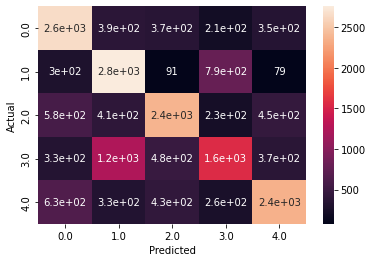

In [263]:
import seaborn as sn
confusion_matrix = pd.crosstab(y_validation, KNN_predictions, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ', accuracy_score(y_validation, KNN_predictions))
plt.show()

In [264]:
KNN_predictions

array([3., 1., 4., ..., 1., 3., 1.])

ROC AUC score: 0.7402014803083574


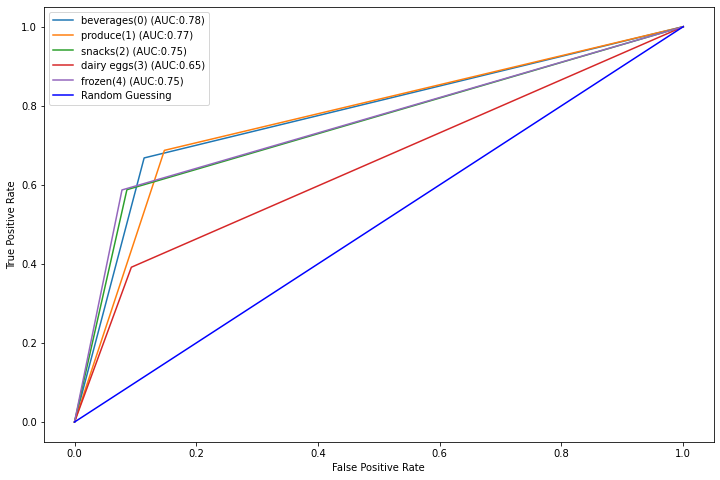

In [265]:
target= ['beverages(0)', 'produce(1)', 'snacks(2)', 'dairy eggs(3)', 'frozen(4)']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_validation, KNN_predictions, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_validation)
    y_validation = lb.transform(y_validation)
    KNN_predictions = lb.transform(KNN_predictions)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_validation[:,idx].astype(int), KNN_predictions[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_validation, KNN_predictions, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(y_validation, KNN_predictions))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

# https://stackoverflow.com/questions/66635552/keras-assessing-the-roc-auc-of-multiclass-cnn

###### KNN shows accuracy score. This could be due to the fact that the model does not suit multi-class classification.

## XGBoost

In [152]:
#!pip install xgboost

In [266]:
import xgboost as xgb

In [267]:
XGB = xgb.XGBClassifier(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                           max_depth = 5, alpha = 10, n_estimators = 10)

In [268]:
XGB_results = cross_val_score(XGB, X_train, y_train, cv=kfold, scoring='accuracy')

In [269]:
print('%s: %f (%f)' % ('XGB', XGB_results.mean(), XGB_results.std()))

XGB: 0.895675 (0.001222)


In [270]:
XGB.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, ...)

In [271]:
# make predictions for test data
y_pred = XGB.predict(X_validation)

In [272]:
predictions = [round(value) for value in y_pred]

In [273]:
# evaluate predictions
accuracy = accuracy_score(y_validation, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

Accuracy: 89.57%


TypeError: 'DataFrame' object is not callable

Accuracy:  0.8957


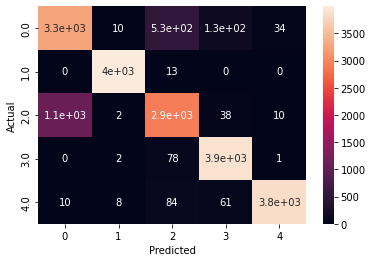

In [274]:
import seaborn as sn
confusion_matrix = pd.crosstab(y_validation, predictions, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ', accuracy_score(y_validation, predictions))
plt.show()

In [275]:
predictions

[3,
 1,
 4,
 4,
 4,
 0,
 3,
 4,
 1,
 1,
 3,
 1,
 4,
 0,
 4,
 1,
 1,
 4,
 1,
 2,
 0,
 2,
 0,
 4,
 0,
 0,
 0,
 2,
 0,
 2,
 4,
 0,
 1,
 4,
 2,
 1,
 4,
 1,
 1,
 2,
 2,
 3,
 0,
 3,
 1,
 1,
 4,
 4,
 1,
 3,
 4,
 2,
 4,
 0,
 2,
 0,
 2,
 3,
 4,
 3,
 1,
 4,
 4,
 3,
 1,
 1,
 1,
 3,
 2,
 0,
 3,
 2,
 3,
 4,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 3,
 2,
 1,
 2,
 0,
 0,
 4,
 1,
 3,
 0,
 3,
 1,
 4,
 3,
 4,
 2,
 4,
 3,
 3,
 4,
 1,
 2,
 4,
 2,
 1,
 0,
 2,
 3,
 1,
 3,
 2,
 0,
 0,
 4,
 0,
 3,
 2,
 4,
 0,
 1,
 4,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 0,
 3,
 4,
 0,
 0,
 0,
 4,
 4,
 4,
 0,
 4,
 0,
 4,
 2,
 3,
 2,
 1,
 0,
 1,
 1,
 0,
 4,
 3,
 0,
 3,
 3,
 0,
 4,
 1,
 1,
 1,
 2,
 0,
 0,
 2,
 1,
 1,
 3,
 3,
 1,
 4,
 3,
 0,
 0,
 4,
 0,
 3,
 4,
 4,
 4,
 4,
 3,
 1,
 0,
 1,
 4,
 0,
 0,
 1,
 3,
 0,
 2,
 3,
 2,
 2,
 2,
 4,
 2,
 4,
 3,
 2,
 0,
 4,
 0,
 2,
 0,
 0,
 1,
 4,
 3,
 1,
 0,
 4,
 4,
 1,
 4,
 3,
 2,
 4,
 0,
 2,
 0,
 2,
 4,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 4,
 0,
 0,
 1,
 3,
 1,
 4,
 0,
 1,
 3,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 0,


ROC AUC score: 0.9349267966479259


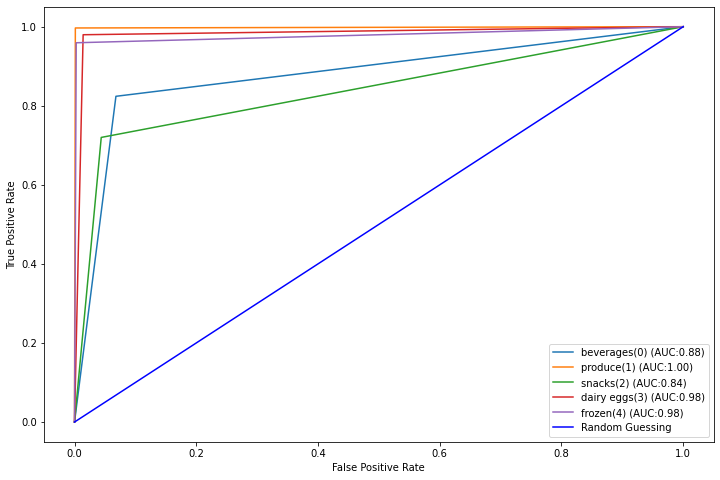

In [276]:
target= ['beverages(0)', 'produce(1)', 'snacks(2)', 'dairy eggs(3)', 'frozen(4)']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_validation, predictions, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_validation)
    y_validation = lb.transform(y_validation)
    predictions = lb.transform(predictions)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_validation[:,idx].astype(int), predictions[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_validation, predictions, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(y_validation, predictions))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

# https://stackoverflow.com/questions/66635552/keras-assessing-the-roc-auc-of-multiclass-cnn

##### Compared to KNN, XGBoost is doing much better both in terms of accuracy and ROC AUC score. This could be due to the fact that XGBoost is a tree-based model and uses ensemble algorithm, which could provide more robust prediction for multi-class classification problem such as this one.

# CNN

In [277]:
from tensorflow.keras import backend as K
from tensorflow import keras
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import numpy as np
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Input
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from keras.layers import Convolution1D, MaxPooling1D
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization
from keras.layers import LeakyReLU

In [278]:
X_train.shape[1:3]

(6,)

In [279]:
X_train_rs = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)

X_validation_rs = np.array(X_validation).reshape(X_validation.shape[0], X_validation.shape[1], 1)

print("X train shape: ", X_train_rs.shape)
print("X validation shape: ", X_validation_rs.shape)

X train shape:  (80000, 6, 1)
X validation shape:  (20000, 6, 1)


In [281]:
# Create sequential model 
cnn_model = tf.keras.models.Sequential()
#First CNN layer  with 32 filters, conv window 3, relu activation and same padding
cnn_model.add(Convolution1D(filters=32, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (X_train_rs.shape[1],1)))
#Second CNN layer  with 64 filters, conv window 3, relu activation and same padding
cnn_model.add(Convolution1D(filters=64, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Third CNN layer with 128 filters, conv window 3, relu activation and same padding
cnn_model.add(Convolution1D(filters=128, kernel_size=(3,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Fourth CNN layer with Max pooling
cnn_model.add(MaxPooling1D(pool_size=(3,), strides=2, padding='same'))
cnn_model.add(Dropout(0.5))
#Flatten the output
cnn_model.add(Flatten())
#Add a dense layer with 256 neurons
cnn_model.add(Dense(units = 256, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Add a dense layer with 512 neurons
cnn_model.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
#Softmax as last layer with five outputs
cnn_model.add(Dense(units = 5, activation='softmax'))
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.summary()

#https://www.analyticsvidhya.com/blog/2021/07/convolution-neural-network-the-base-for-many-deep-learning-algorithms-cnn-illustrated-by-1-d-ecg-signal-physionet/


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 6, 32)             128       
                                                                 
 conv1d_7 (Conv1D)           (None, 6, 64)             6208      
                                                                 
 conv1d_8 (Conv1D)           (None, 6, 128)            24704     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 3, 128)           0         
 1D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 3, 128)            0         
                                                                 
 flatten_2 (Flatten)         (None, 384)               0         
                                                      

In [282]:
history = cnn_model.fit(x=X_train, y=y_train_dl, epochs=20, batch_size=256, verbose=1, validation_split = 0.2)

Epoch 1/20
250/250 [==============================] - 5s 15ms/step - loss: 1.4468 - accuracy: 0.3410 - val_loss: 1.2210 - val_accuracy: 0.4288
Epoch 2/20
250/250 [==============================] - 3s 12ms/step - loss: 1.1903 - accuracy: 0.4699 - val_loss: 1.0499 - val_accuracy: 0.5637
Epoch 3/20
250/250 [==============================] - 3s 12ms/step - loss: 0.9689 - accuracy: 0.5805 - val_loss: 0.9188 - val_accuracy: 0.5913
Epoch 4/20
250/250 [==============================] - 3s 13ms/step - loss: 0.7911 - accuracy: 0.6591 - val_loss: 0.6864 - val_accuracy: 0.7076
Epoch 5/20
250/250 [==============================] - 3s 12ms/step - loss: 0.7263 - accuracy: 0.6945 - val_loss: 0.5914 - val_accuracy: 0.7666
Epoch 6/20
250/250 [==============================] - 3s 12ms/step - loss: 0.6497 - accuracy: 0.7326 - val_loss: 0.5793 - val_accuracy: 0.7554
Epoch 7/20
250/250 [==============================] - 3s 12ms/step - loss: 0.6109 - accuracy: 0.7478 - val_loss: 0.4882 - val_accuracy: 0.7851

In [283]:
#then train it again
cnn_model.fit(X_train,y_train_dl)

#then we make a prediction using the validation data
CNN_predictions = cnn_model.predict(X_validation)

2500/2500 [==============================] - 13s 5ms/step - loss: 0.6093 - accuracy: 0.7510


In [284]:
CNN_predictions.shape

(20000, 5)

In [285]:
cnnpreds = []
for i in range(0,len(CNN_predictions)):
    cnnpreds.append(CNN_predictions[i].argmax())
    
cnnactual = []
for i in range(0,len(y_validation_dl)):
    cnnactual.append(y_validation_dl[i].argmax())
    

In [286]:
cnnpreds

[3,
 1,
 0,
 0,
 4,
 0,
 4,
 0,
 1,
 1,
 3,
 1,
 4,
 0,
 4,
 1,
 1,
 4,
 1,
 2,
 2,
 2,
 0,
 4,
 0,
 0,
 2,
 2,
 0,
 4,
 0,
 0,
 1,
 4,
 1,
 1,
 4,
 1,
 1,
 2,
 2,
 3,
 0,
 3,
 1,
 1,
 0,
 4,
 1,
 3,
 0,
 2,
 0,
 0,
 2,
 2,
 4,
 3,
 0,
 3,
 1,
 4,
 4,
 3,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 3,
 4,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 3,
 0,
 0,
 4,
 0,
 0,
 4,
 1,
 2,
 0,
 3,
 1,
 4,
 3,
 4,
 2,
 4,
 3,
 3,
 0,
 1,
 4,
 4,
 2,
 1,
 0,
 2,
 3,
 1,
 3,
 3,
 0,
 0,
 4,
 0,
 3,
 2,
 4,
 2,
 1,
 0,
 2,
 1,
 2,
 4,
 4,
 2,
 1,
 2,
 2,
 3,
 0,
 0,
 2,
 2,
 4,
 4,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 2,
 1,
 0,
 1,
 0,
 0,
 4,
 1,
 0,
 3,
 4,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 3,
 2,
 1,
 4,
 4,
 0,
 0,
 4,
 0,
 3,
 0,
 0,
 0,
 4,
 3,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 4,
 3,
 2,
 0,
 4,
 0,
 0,
 0,
 2,
 1,
 4,
 3,
 1,
 0,
 4,
 4,
 1,
 0,
 1,
 2,
 0,
 0,
 2,
 0,
 2,
 4,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 4,
 2,
 0,
 1,
 3,
 1,
 0,
 0,
 1,
 3,
 1,
 0,
 1,
 2,
 0,
 2,
 0,
 0,


In [287]:
cnnactual

[3,
 1,
 4,
 4,
 4,
 0,
 3,
 4,
 1,
 1,
 3,
 1,
 4,
 0,
 4,
 1,
 1,
 4,
 1,
 2,
 2,
 2,
 0,
 4,
 0,
 0,
 2,
 2,
 0,
 3,
 4,
 0,
 1,
 4,
 2,
 1,
 4,
 1,
 1,
 2,
 2,
 3,
 0,
 3,
 1,
 1,
 4,
 4,
 1,
 3,
 0,
 2,
 4,
 0,
 2,
 2,
 2,
 3,
 4,
 3,
 1,
 4,
 4,
 3,
 1,
 1,
 1,
 3,
 2,
 2,
 3,
 2,
 3,
 4,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 3,
 2,
 0,
 2,
 0,
 0,
 4,
 1,
 3,
 0,
 3,
 1,
 4,
 3,
 4,
 2,
 4,
 3,
 3,
 4,
 1,
 2,
 4,
 2,
 1,
 0,
 2,
 3,
 1,
 3,
 4,
 0,
 0,
 4,
 0,
 3,
 2,
 4,
 2,
 1,
 4,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 3,
 4,
 0,
 2,
 2,
 4,
 4,
 4,
 0,
 4,
 0,
 4,
 2,
 3,
 2,
 1,
 0,
 1,
 1,
 0,
 4,
 3,
 0,
 3,
 4,
 0,
 4,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 3,
 2,
 1,
 4,
 3,
 0,
 0,
 4,
 0,
 3,
 4,
 4,
 4,
 4,
 3,
 1,
 0,
 1,
 4,
 2,
 0,
 1,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 4,
 2,
 4,
 3,
 2,
 0,
 4,
 0,
 0,
 0,
 2,
 1,
 4,
 3,
 1,
 0,
 4,
 4,
 1,
 4,
 3,
 2,
 4,
 0,
 2,
 0,
 2,
 4,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 4,
 2,
 0,
 1,
 3,
 1,
 4,
 0,
 1,
 3,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 0,


In [288]:
from sklearn import metrics
reportcnn = metrics.classification_report(cnnactual, cnnpreds, target_names = ['0','1','2','3','4'])
print(reportcnn)


              precision    recall  f1-score   support

           0       0.72      0.94      0.82      3964
           1       0.94      0.97      0.95      4009
           2       0.84      0.76      0.80      4038
           3       0.98      0.77      0.87      3979
           4       0.78      0.74      0.76      4010

    accuracy                           0.84     20000
   macro avg       0.85      0.84      0.84     20000
weighted avg       0.85      0.84      0.84     20000



Accuracy:  0.83845


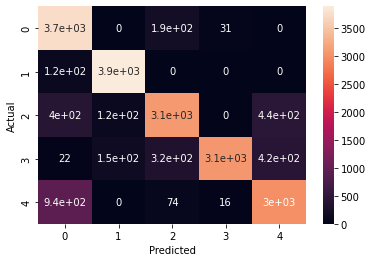

In [289]:
import seaborn as sn
confusion_matrix = pd.crosstab(cnnactual, cnnpreds, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ', accuracy_score(cnnactual, cnnpreds))
plt.show()

#print(accuracy_score(y_validation, rf_predictions))
#print(confusion_matrix(y_validation, rf_predictions))
#print(classification_report(y_validation, rf_predictions))

In [290]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

ROC AUC score: 0.8991653902589176


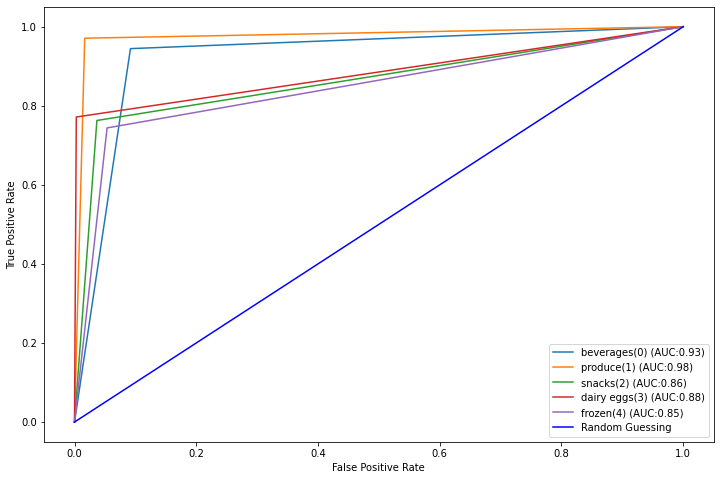

In [291]:
target= ['beverages(0)', 'produce(1)', 'snacks(2)', 'dairy eggs(3)', 'frozen(4)']

# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_validation_dl, CNN_predictions, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_validation_dl)
    y_validation_dl = lb.transform(y_validation_dl)
    CNN_predictions = lb.transform(CNN_predictions)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_validation_dl[:,idx].astype(int), CNN_predictions[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_validation_dl, CNN_predictions, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(cnnactual, cnnpreds))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

# https://stackoverflow.com/questions/66635552/keras-assessing-the-roc-auc-of-multiclass-cnn

###### Even though the dataset is not as complicated to require neural networks, CNN seems to be giving rather good predictions, considering that it has to predict five target variables.

# DNN

In [324]:
Input = InputLayer(input_shape=(4,))
opt = Adam(learning_rate=0.01)

modeldnn = keras.Sequential()
modeldnn.add(Input)
modeldnn.add(Dense(32, activation='relu'))
modeldnn.add(Dropout(0.1))
modeldnn.add(Dense(32, activation='relu'))
modeldnn.add(Dropout(0.2))
modeldnn.add(Dense(32, activation='relu'))
modeldnn.add(Dense(5))
modeldnn.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
modeldnn.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                160       
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_23 (Dense)            (None, 32)                1056      
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_24 (Dense)            (None, 32)                1056      
                                                                 
 dense_25 (Dense)            (None, 5)                 165       
                                                                 
Total params: 2,437
Trainable params: 2,437
Non-train

In [325]:
# using test data

history = modeldnn.fit(x=X_train, y=y_train_dl, epochs=10, batch_size=256, verbose=1, validation_split = 0.2)
DNN_relu_test_predict = modeldnn.predict(X_train)
DNN_relu_test_predict = modeldnn.predict(X_validation)

Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 1.8390 - accuracy: 0.2153 - val_loss: 1.5920 - val_accuracy: 0.2415
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 1.8626 - accuracy: 0.2210 - val_loss: 1.6054 - val_accuracy: 0.2319
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 1.6046 - accuracy: 0.2263 - val_loss: 1.5966 - val_accuracy: 0.2495
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 1.6415 - accuracy: 0.2438 - val_loss: 1.7106 - val_accuracy: 0.2935
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 1.8136 - accuracy: 0.2842 - val_loss: 1.5046 - val_accuracy: 0.3399
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 1.8858 - accuracy: 0.2561 - val_loss: 1.6041 - val_accuracy: 0.2426
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 1.6032 - accuracy: 0.2267 - val_loss: 1.5951 - val_accuracy: 0.2492
Epoch 

In [326]:
#then train it again
#modeldnn.fit(X_train,y_train)

#then we make a prediction using the validation data
DNN_predictions = modeldnn.predict(X_validation)

In [327]:
DNN_predictions.shape

(20000, 5)

In [328]:
dnnpreds = []
for i in range(0,len(DNN_predictions)):
    dnnpreds.append(DNN_predictions[i].argmax())
    
dnnactual = []
for i in range(0,len(y_validation_dl)):
    dnnactual.append(y_validation_dl[i].argmax())
    

In [329]:
dnnpreds

[3,
 3,
 4,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 4,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 4,
 1,
 3,
 4,
 3,
 3,
 4,
 2,
 3,
 3,
 1,
 3,
 1,
 4,
 3,
 4,
 3,
 4,
 1,
 4,
 3,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 2,
 4,
 1,
 4,
 4,
 3,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 1,
 4,
 4,
 1,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 4,
 3,
 2,
 4,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 2,
 3,
 4,
 3,
 2,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 3,
 1,
 4,
 3,
 3,
 1,
 3,
 1,
 1,
 4,
 3,
 3,
 4,
 4,
 1,
 3,
 4,
 3,
 3,
 3,
 2,
 3,
 1,
 3,
 3,
 3,
 3,
 4,
 1,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 4,
 3,
 3,
 3,
 4,
 2,
 4,
 3,
 4,
 2,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 1,
 4,
 3,
 1,
 3,
 4,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 1,
 3,
 4,
 1,
 3,
 4,
 1,
 2,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 4,
 3,
 3,
 3,
 3,
 4,
 3,
 1,
 3,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 4,
 4,
 2,
 4,
 3,
 3,
 3,
 1,


In [330]:
dnnactual

[3,
 4,
 4,
 0,
 3,
 2,
 3,
 1,
 0,
 3,
 3,
 1,
 2,
 2,
 3,
 3,
 1,
 2,
 2,
 0,
 0,
 1,
 3,
 4,
 4,
 3,
 2,
 0,
 2,
 0,
 3,
 2,
 2,
 0,
 3,
 1,
 2,
 3,
 0,
 1,
 3,
 1,
 0,
 1,
 4,
 0,
 0,
 2,
 0,
 3,
 1,
 1,
 3,
 4,
 2,
 1,
 0,
 3,
 0,
 2,
 0,
 0,
 1,
 2,
 2,
 1,
 3,
 0,
 2,
 2,
 3,
 1,
 0,
 4,
 4,
 1,
 4,
 0,
 3,
 4,
 4,
 3,
 2,
 4,
 2,
 2,
 3,
 0,
 2,
 1,
 2,
 2,
 2,
 0,
 4,
 0,
 2,
 2,
 4,
 2,
 3,
 3,
 0,
 3,
 2,
 3,
 2,
 0,
 4,
 2,
 2,
 0,
 3,
 4,
 2,
 4,
 2,
 1,
 4,
 1,
 0,
 0,
 0,
 3,
 4,
 3,
 0,
 2,
 0,
 0,
 4,
 0,
 1,
 0,
 4,
 2,
 0,
 2,
 2,
 3,
 0,
 1,
 2,
 3,
 3,
 0,
 3,
 3,
 2,
 4,
 0,
 2,
 1,
 3,
 0,
 0,
 3,
 1,
 4,
 0,
 1,
 4,
 4,
 3,
 2,
 4,
 1,
 0,
 0,
 4,
 2,
 4,
 0,
 3,
 2,
 0,
 0,
 1,
 4,
 0,
 4,
 1,
 3,
 0,
 3,
 1,
 4,
 3,
 0,
 0,
 1,
 4,
 1,
 3,
 3,
 1,
 3,
 1,
 1,
 3,
 4,
 2,
 4,
 1,
 0,
 4,
 3,
 0,
 4,
 1,
 2,
 0,
 3,
 1,
 0,
 1,
 1,
 2,
 4,
 3,
 3,
 3,
 0,
 1,
 0,
 1,
 0,
 3,
 0,
 2,
 0,
 3,
 1,
 4,
 0,
 2,
 4,
 3,
 1,
 3,
 3,
 2,
 4,
 0,
 2,
 4,
 2,
 3,
 1,
 1,


In [331]:
from sklearn import metrics
reportdnn = metrics.classification_report(dnnactual, dnnpreds, target_names = ['0','1','2','3','4'])
print(reportdnn)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4065
           1       0.48      0.24      0.32      3979
           2       0.91      0.16      0.27      4041
           3       0.24      0.74      0.37      3958
           4       0.43      0.58      0.49      3957

    accuracy                           0.34     20000
   macro avg       0.41      0.34      0.29     20000
weighted avg       0.41      0.34      0.29     20000



/Users/jass/my_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jass/my_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jass/my_tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.34045


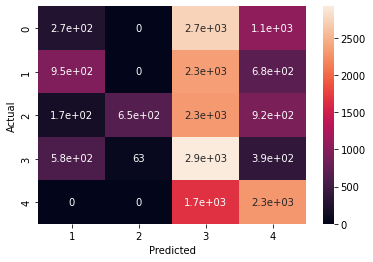

In [332]:
import seaborn as sn
confusion_matrix = pd.crosstab(dnnactual, dnnpreds, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ', accuracy_score(dnnactual, dnnpreds))
plt.show()

#print(accuracy_score(y_validation, rf_predictions))
#print(confusion_matrix(y_validation, rf_predictions))
#print(classification_report(y_validation, rf_predictions))

##### DNN has very poor performance. Machine learning models could provide better perdictions in this case. This indicates that the dataset is not that complicated and traditional machine learning models might be already doing a good job.

## RNN

In [333]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%pylab inline

import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [334]:
regressor = Sequential()
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

In [335]:
regressor.compile(optimizer= "adam", loss = "mean_squared_error", metrics=['accuracy'])

In [336]:
regressor.fit(X_train, y_train_dl, epochs = 10, batch_size = 256)

Epoch 1/10
313/313 [==============================] - 5s 10ms/step - loss: 0.1958 - accuracy: 0.7761
Epoch 2/10
313/313 [==============================] - 3s 10ms/step - loss: 0.1636 - accuracy: 0.7999
Epoch 3/10
313/313 [==============================] - 3s 10ms/step - loss: 0.1616 - accuracy: 0.8000
Epoch 4/10
313/313 [==============================] - 4s 13ms/step - loss: 0.1609 - accuracy: 0.8000
Epoch 5/10
313/313 [==============================] - 3s 10ms/step - loss: 0.1606 - accuracy: 0.8000
Epoch 6/10
313/313 [==============================] - 3s 11ms/step - loss: 0.1604 - accuracy: 0.8000
Epoch 7/10
313/313 [==============================] - 3s 11ms/step - loss: 0.1603 - accuracy: 0.8000
Epoch 8/10
313/313 [==============================] - 3s 10ms/step - loss: 0.1602 - accuracy: 0.8000
Epoch 9/10
313/313 [==============================] - 3s 10ms/step - loss: 0.1602 - accuracy: 0.8000
Epoch 10/10
313/313 [==============================] - 3s 10ms/step - loss: 0.1601 - accura

In [337]:
#then train it again
#regressor.fit(X_train,y_train)

#then we make a prediction using the validation data
RNN_predictions = regressor.predict(X_validation)

In [338]:
rnnpreds = []
for i in range(0,len(RNN_predictions)):
    rnnpreds.append(RNN_predictions[i].argmax())
    
rnnactual = []
for i in range(0,len(y_validation_dl)):
    rnnactual.append(y_validation_dl[i].argmax())
    

In [339]:
rnnpreds

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [340]:
from sklearn import metrics
reportrnn = metrics.classification_report(rnnactual, rnnpreds, target_names = ['0','1','2','3','4'])
print(reportrnn)


              precision    recall  f1-score   support

           0       0.20      1.00      0.34      4065
           1       0.00      0.00      0.00      3979
           2       0.00      0.00      0.00      4041
           3       0.00      0.00      0.00      3958
           4       0.00      0.00      0.00      3957

    accuracy                           0.20     20000
   macro avg       0.04      0.20      0.07     20000
weighted avg       0.04      0.20      0.07     20000



Accuracy:  0.20325


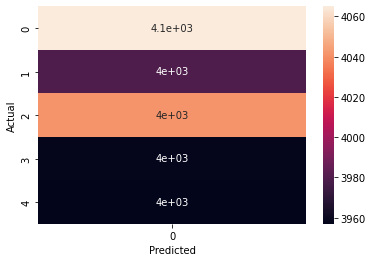

In [341]:
import seaborn as sn
confusion_matrix = pd.crosstab(rnnactual, rnnpreds, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ', accuracy_score(rnnactual, rnnpreds))
plt.show()

##### Similar to DNN, RNN has a very poor performance. This is because this dataset is quite straightforward and is not sequential, therefore RNN is not suitable. 